In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
dataframe = pd.read_csv('Europe_Oil_Price.csv', usecols=[1])
dataframe

,PriceDollarsPerBarrel
0,59.41
1,57.36
2,64.75
3,81.03
4,78.89
5,72.53
6,74.25
7,74.41
8,76.98
9,72.11


In [27]:
dataframe = pd.DataFrame(dataframe)
dataframe = dataframe.sort_index(ascending=False)
dataframe = dataframe.reset_index(drop=True)
dataframe

,PriceDollarsPerBarrel
0,18.58
1,18.86
2,19.86
3,18.98
4,18.31
5,18.76
6,17.78
7,17.05
8,16.75
9,15.73


Text(0, 0.5, 'Price per Month')

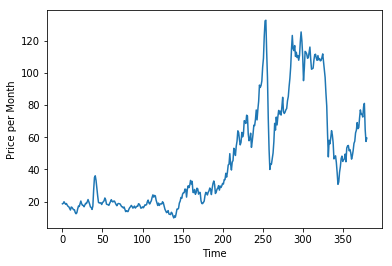

In [28]:
plt.plot(dataframe)
plt.xlabel('Time')
plt.ylabel('Price per Month')

In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [0]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [0]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [33]:
dataset

array([[0.07127747],
       [0.07355574],
       [0.08169244],
       [0.07453214],
       [0.06908055],
       [0.07274207],
       [0.06476811],
       [0.05882831],
       [0.05638731],
       [0.04808788],
       [0.03995118],
       [0.05516681],
       [0.05280715],
       [0.04654191],
       [0.04141579],
       [0.04125306],
       [0.02733931],
       [0.02107405],
       [0.02603744],
       [0.04467047],
       [0.05980472],
       [0.05752644],
       [0.07225387],
       [0.08543532],
       [0.07168429],
       [0.06387307],
       [0.06346624],
       [0.05655004],
       [0.06468675],
       [0.07396257],
       [0.07249796],
       [0.08152971],
       [0.09300244],
       [0.0812856 ],
       [0.06973149],
       [0.05524817],
       [0.05313264],
       [0.04296176],
       [0.05980472],
       [0.14117168],
       [0.20406836],
       [0.21318144],
       [0.1891782 ],
       [0.15012205],
       [0.11187957],
       [0.0790887 ],
       [0.07534581],
       [0.076

In [34]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

255 126


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [37]:
trainX.shape

(251, 3)

In [38]:
trainX

array([[0.07127747, 0.07355574, 0.08169244],
       [0.07355574, 0.08169244, 0.07453214],
       [0.08169244, 0.07453214, 0.06908055],
       [0.07453214, 0.06908055, 0.07274207],
       [0.06908055, 0.07274207, 0.06476811],
       [0.07274207, 0.06476811, 0.05882831],
       [0.06476811, 0.05882831, 0.05638731],
       [0.05882831, 0.05638731, 0.04808788],
       [0.05638731, 0.04808788, 0.03995118],
       [0.04808788, 0.03995118, 0.05516681],
       [0.03995118, 0.05516681, 0.05280715],
       [0.05516681, 0.05280715, 0.04654191],
       [0.05280715, 0.04654191, 0.04141579],
       [0.04654191, 0.04141579, 0.04125306],
       [0.04141579, 0.04125306, 0.02733931],
       [0.04125306, 0.02733931, 0.02107405],
       [0.02733931, 0.02107405, 0.02603744],
       [0.02107405, 0.02603744, 0.04467047],
       [0.02603744, 0.04467047, 0.05980472],
       [0.04467047, 0.05980472, 0.05752644],
       [0.05980472, 0.05752644, 0.07225387],
       [0.05752644, 0.07225387, 0.08543532],
       [0.

In [39]:
trainY

array([0.07453214, 0.06908055, 0.07274207, 0.06476811, 0.05882831,
       0.05638731, 0.04808788, 0.03995118, 0.05516681, 0.05280715,
       0.04654191, 0.04141579, 0.04125306, 0.02733931, 0.02107405,
       0.02603744, 0.04467047, 0.05980472, 0.05752644, 0.07225387,
       0.08543532, 0.07168429, 0.06387307, 0.06346624, 0.05655004,
       0.06468675, 0.07396257, 0.07249796, 0.08152971, 0.09300244,
       0.0812856 , 0.06973149, 0.05524817, 0.05313264, 0.04296176,
       0.05980472, 0.14117168, 0.20406836, 0.21318144, 0.1891782 ,
       0.15012205, 0.11187957, 0.0790887 , 0.07534581, 0.07615948,
       0.07624085, 0.06794141, 0.07794955, 0.08096014, 0.08689992,
       0.10081366, 0.0918633 , 0.06989422, 0.06786005, 0.06696501,
       0.0635476 , 0.07404394, 0.08193654, 0.09227014, 0.08478437,
       0.08071603, 0.08502848, 0.08494711, 0.07640357, 0.06769732,
       0.06159478, 0.07038242, 0.07298617, 0.07200977, 0.0707079 ,
       0.06371033, 0.05663142, 0.05598049, 0.05036616, 0.05524

In [40]:
testX.shape

(122, 3)

In [0]:
# create and fit the ANN network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = 3))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [43]:
history = model.fit(trainX, trainY, epochs=100, batch_size=2)

Epoch 1/100
251/251 [==============================] - 0s 1ms/step - loss: 0.1049
Epoch 2/100
251/251 [==============================] - 0s 561us/step - loss: 0.0246
Epoch 3/100
251/251 [==============================] - 0s 520us/step - loss: 0.0025
Epoch 4/100
251/251 [==============================] - 0s 523us/step - loss: 0.0017
Epoch 5/100
251/251 [==============================] - 0s 523us/step - loss: 0.0015
Epoch 6/100
251/251 [==============================] - 0s 540us/step - loss: 0.0013
Epoch 7/100
251/251 [==============================] - 0s 530us/step - loss: 0.0015
Epoch 8/100
251/251 [==============================] - 0s 527us/step - loss: 0.0014
Epoch 9/100
251/251 [==============================] - 0s 535us/step - loss: 0.0013
Epoch 10/100
251/251 [==============================] - 0s 519us/step - loss: 0.0011
Epoch 11/100
251/251 [==============================] - 0s 521us/step - loss: 0.0011
Epoch 12/100
251/251 [==============================] - 0s 558us/step - loss

In [44]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.96 RMSE
Test Score: 8.01 RMSE


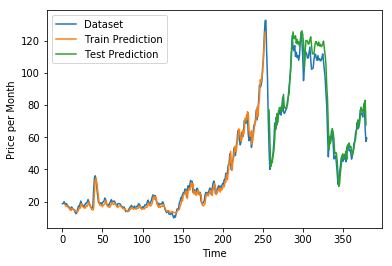

In [45]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label = 'Dataset')
plt.plot(trainPredictPlot, label = 'Train Prediction')
plt.plot(testPredictPlot, label = 'Test Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price per Month')
plt.show()